In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import plot_ellipse, moca, dopioe, espra


In [2]:
width=500
x = np.linspace(-width // 2, width // 2, 101)
y = np.linspace(-width // 2, width // 2, 101)
X, Y = np.meshgrid(x, y, indexing='ij')
# psi0 = 80
# Rc = 45
# xc, yc = 0, 0 
# q11, q12, q22 = 2.0, 1.0, 2.0

psi0 = 80
Rc = 45
xc, yc = 0, 0 
q11, q12, q22 = 2.0, 1.0, 2.0

dx, dy = X-xc, Y-yc
rho      = q11*dx**2 + 2*q12*dx*dy + q22*dy**2
rho_x    = 2*q11*dx   + 2*q12*dy
rho_y    = 2*q12*dx   + 2*q22*dy
exp_t    = np.exp(-rho/Rc**2)
u   =  psi0/Rc**2 * rho_y * exp_t
v   = -psi0/Rc**2 * rho_x * exp_t

df_res = pd.DataFrame(columns=['xc', 'yc', 'w', 'Q11', 'Q12', 'Q22', 'Rc', 'psi0', 'q11', 'q12', 'q22'])
s = -q11*psi0 / Rc**2
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': 2*s*(q11+q22),
                           'Q11': s * q11, 'Q12': s * q12, 'Q22': s * q22, 
                           'Rc': Rc, 'psi0': psi0, 'q11': q11, 'q12': q12, 'q22': q22}



(-100.0, 100.0)

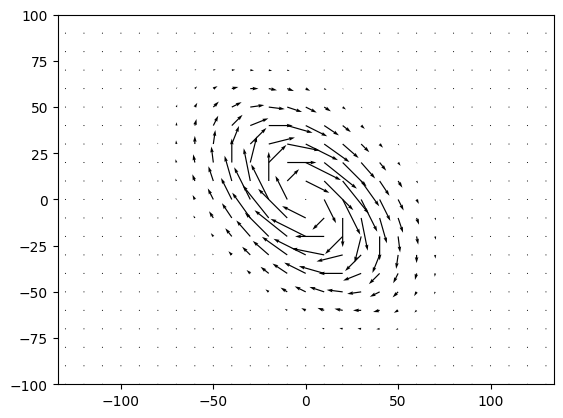

In [3]:
spac = 2
plt.quiver(X[::spac,::spac], Y[::spac,::spac], u[::spac,::spac], v[::spac,::spac], scale=30)
plt.axis('equal')
plt.xlim(-100, 100)
plt.ylim(-100, 100)


/scratch/pbs.6747492.kman.restech.unsw.edu.au/ipykernel_3408582/1779281380.py:5: RuntimeWarning: invalid value encountered in divide
  v_theta = (-u * dy + v * dx) / r


Text(0, 0.5, 'v_theta')

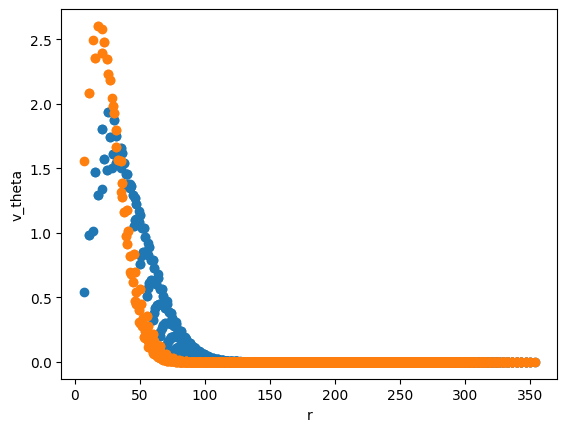

In [4]:
## All data
dx = X - xc
dy = Y - yc
r = np.hypot(dx, dy)
v_theta = (-u * dy + v * dx) / r
v_theta = np.where(r>0, v_theta, 0.0)

mask = (X < xc) & (Y > yc)
plt.scatter(r[mask], np.abs(v_theta)[mask])
mask = (X > xc) & (Y > yc)
plt.scatter(r[mask], np.abs(v_theta)[mask])
plt.xlabel('r')
plt.ylabel('v_theta')

$dx=x-x_c, \quad dy = y-y_c, \quad r=\sqrt{dx^2+dy^2}$
\
unit tangent is $ \mathbf{e}_\theta=(-dy/r, dx/r)$
\
$$ v_\theta=(u,v)\cdot\mathbf{e}_\theta=\frac{-udy+vdx}{r}. $$



Using $ \rho^2_xdx+\rho^2_ydy=2\rho^2$ where $\rho^2 = q_{11}dx^2+2q_{12}\cdot dx \cdot dy + q_{22}dy^2$


\
$$ v_\theta(x,y)=-\frac{2\psi_0}{R_c^2}\frac{\rho^2}{r}\exp{(-\rho^2/R_c^2)} $$


## Transect

,xc,yc,w,Q11,Q12,Q22,Rc,psi0,q11,q12,q22
Control,0.000000e+00,0.000000e+00,-0.632099,-0.158025,-0.079012,-0.158025,45.000000,80.000000,2.0,1.000000,2.0
MOCA,-1.492140e-13,2.908720e-14,-0.173668,-0.043417,0.000000,-0.043417,35.355339,87.835322,2.0,-0.000000,2.0
DOPIOE,0.000000e+00,-1.920409e-15,-0.173668,-0.043417,-0.021708,-0.043417,35.355339,87.835322,2.0,1.000000,2.0
ESPRA,-1.552318e-08,1.244949e-08,-0.281746,-0.070437,-0.033837,-0.070437,15.811388,38.357209,2.0,0.960772,2.0


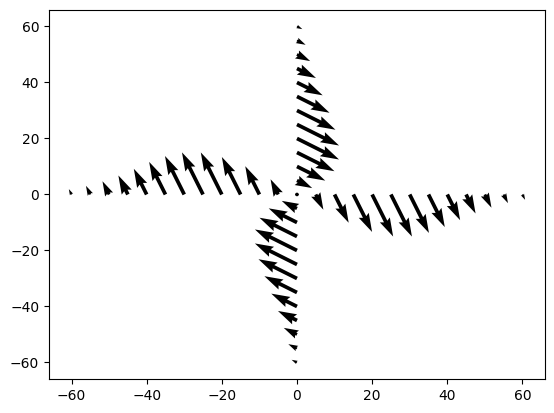

In [5]:
nic, njc, r = 50, 50, 12

# Transect Data
x1 = x[nic-r:nic+r+1]
y1 = np.array([y[njc]]*len(x1))
u1, v1 = u[nic-r:nic+r+1, njc], v[nic-r:nic+r+1, njc]
plt.quiver(x1, y1, u1, v1)
y2 = y[nic-r:nic+r+1]
x2 = np.array([x[nic]]*len(y2))
u2, v2 = u[nic, njc-r:njc+r+1], v[nic, njc-r:njc+r+1]
plt.quiver(x2, y2, u2, v2)

# Scattered Data
i_mask, j_mask = np.where(np.hypot(X-x[nic], Y-y[njc]) < r)
xi, yi = X[i_mask, j_mask], Y[i_mask, j_mask]
ui, vi = u[i_mask, j_mask], v[i_mask, j_mask]

# MOCA
xc_moc, yc_moc, w_moc, Q_moc, Rc_moc, psi0_moc = moca(x1-x1[0], u1, v1)
xc_moc += x1[0]  
yc_moc += y1[0]  
s_moc = (4*q11)/w_moc # IM USING INFO I DONT HAVE !!!
q_moc = s_moc*Q_moc
q11_moc, q12_moc, q22_moc = q_moc[0, 0], q_moc[0, 1], q_moc[1, 1]

df_res.loc[len(df_res)] = {'xc': xc_moc, 'yc': yc_moc, 'w': w_moc,
                           'Q11': Q_moc[0, 0], 'Q12': Q_moc[0, 1], 'Q22': Q_moc[1, 1],
                           'Rc': Rc_moc, 'psi0': psi0_moc, 'q11': q11_moc, 'q12': q12_moc, 'q22': q22_moc}

# DOPIOE
xc_dop, yc_dop, w_dop, Q_dop, Rc_dop, psi0_dop = dopioe(x1, y1, u1, v1, x2, y2, u2, v2)
s_dop = (4*q11)/w_dop
q_dop = s_dop*Q_dop
q11_dop, q12_dop, q22_dop = q_dop[0, 0], q_dop[0, 1], q_dop[1, 1]

df_res.loc[len(df_res)] = {'xc': xc_dop, 'yc': yc_dop, 'w': w_dop,
                           'Q11': Q_dop[0, 0], 'Q12': Q_dop[0, 1], 'Q22': Q_dop[1, 1],
                           'Rc': Rc_dop, 'psi0': psi0_dop, 'q11': q11_dop, 'q12': q12_dop, 'q22': q22_dop}

# ESPRA
xc_esp, yc_esp, w_esp, Q_esp, Rc_esp, psi0_esp = espra(xi, yi, ui, vi)
s_esp = (4*q11)/w_esp
q_esp = s_esp*Q_esp
q11_esp, q12_esp, q22_esp = q_esp[0, 0], q_esp[0, 1], q_esp[1, 1]

df_res.loc[len(df_res)] = {'xc': xc_esp, 'yc': yc_esp, 'w': w_esp,
                           'Q11': Q_esp[0, 0], 'Q12': Q_esp[0, 1], 'Q22': Q_esp[1, 1],
                           'Rc': Rc_esp, 'psi0': psi0_esp, 'q11': q11_esp, 'q12': q12_esp, 'q22': q22_esp}

df_res.index = ['Control', 'MOCA', 'DOPIOE', 'ESPRA']
df_res

Special Case ciruclar symetry
$$v_\theta(r)=-\frac{d\psi}{dr}=2\frac{\psi_0}{R_c^2}re^{-r^2/R_c^2} $$

/scratch/pbs.6747492.kman.restech.unsw.edu.au/ipykernel_3408582/3853835400.py:14: RuntimeWarning: invalid value encountered in divide
  v_theta = (-u1 * dy + v1 * dx) / r


Text(0, 0.5, 'v_theta')

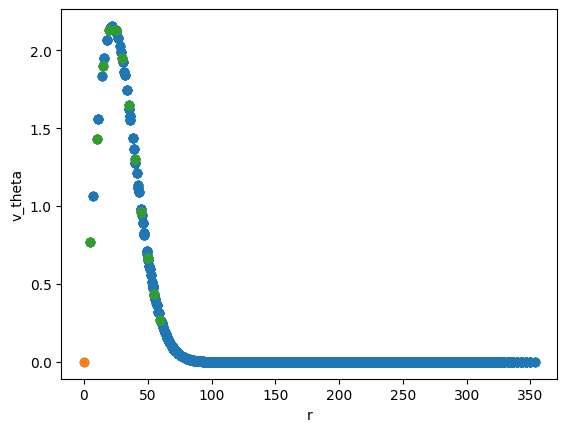

In [6]:
## What we expect
dx = X - xc
dy = Y - yc
r = np.hypot(dx, dy)

v_theta = 2*q11*psi0/Rc**2*r*np.exp(-q11*r**2/Rc**2)
plt.scatter(r, v_theta)


## Transect data
dx = x1 - xc
dy = y1 - yc
r = np.hypot(dx, dy)
v_theta = (-u1 * dy + v1 * dx) / r
v_theta = np.where(r>0, v_theta, 0.0)

mask = x1 <= xc
plt.scatter(r[mask], np.abs(v_theta)[mask])
mask = x1 > xc
plt.scatter(r[mask], np.abs(v_theta)[mask])
plt.xlabel('r')
plt.ylabel('v_theta')   


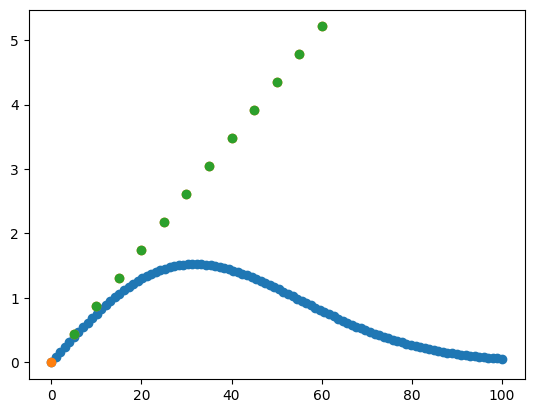

In [7]:
## What we expect
dx = X - xc
dy = Y - yc
r = np.hypot(dx, dy)
r = np.linspace(0, 100, 100)
v_theta = 2*psi0/Rc**2*r*np.exp(-r**2/Rc**2)
plt.scatter(r, v_theta)


## Transect data
dx = x1 - xc
dy = y1 - yc
r = np.hypot(dx, dy)
v_theta = r * w_moc / 2
v_theta = np.where(r>0, v_theta, 0.0)

mask = x1 <= xc
plt.scatter(r[mask], np.abs(v_theta)[mask])
mask = x1 > xc
plt.scatter(r[mask], np.abs(v_theta)[mask])


$$\psi^{core}=\psi_0(1-r^2/R_c^2)\Rightarrow v_\theta^{core}(r)=-\frac{d\psi^{core}}{dr}=-\frac{2\psi_0}{R_c^2}$$
For a unifromly rotating vortex $v_\theta=r\omega/2$. So by equating hte two
$$\frac{\psi_0}{R_c^2}=-\frac{\omega}{4}\Rightarrow q=\frac{4Q}{\omega}$$



In [8]:
df_res

,xc,yc,w,Q11,Q12,Q22,Rc,psi0,q11,q12,q22
Control,0.000000e+00,0.000000e+00,-0.632099,-0.158025,-0.079012,-0.158025,45.000000,80.000000,2.0,1.000000,2.0
MOCA,-1.492140e-13,2.908720e-14,-0.173668,-0.043417,0.000000,-0.043417,35.355339,87.835322,2.0,-0.000000,2.0
DOPIOE,0.000000e+00,-1.920409e-15,-0.173668,-0.043417,-0.021708,-0.043417,35.355339,87.835322,2.0,1.000000,2.0
ESPRA,-1.552318e-08,1.244949e-08,-0.281746,-0.070437,-0.033837,-0.070437,15.811388,38.357209,2.0,0.960772,2.0


#### Circle Symetry but $q_{11}=q_{22}=A$

$\rho^2=A(x-x_c)^2+ A(y-y_c)^2=Ar^2$ where $r=\sqrt{(x-x_c)^2+(y-y_c)^2}$. Hence
$$\psi(r)=\psi_0\exp(-\rho^2/R_c^2)=\psi_0\exp(-Ar^2/R_c^2)=\psi_0\exp(-\frac{r^2}{(R_c/\sqrt{A})^2})$$
Therefore we can think of it exactly as the $A=1$ case, but with an effective core-radius 
$$R_c^{'}=\frac{R_c}{\sqrt{A}}$$

Hence we get the updated relationship
$$ \frac{\psi_0}{R_c^2} = \frac{\omega}{4A}$$

In [9]:
data = df_res.iloc[1]
data.Q11

np.float64(-0.04341698486805792)

In [10]:
data.w/4

np.float64(-0.04341698486805792)